# Heart Disease Dataset Notebook

## Essential Libraries

 - For data wrangling we can use the Pandas and Numpy Libraries
 - To Visualise the data for intuitive understanding we can use Seaborn, Matplotlib and Plotly
 - To perform Supervised and Unsupervised Learning we will use the Scikit-Learn library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from scipy.stats import kde, gaussian_kde
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



Improve readability of notebook by removing warnings 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df1 = pd.read_csv("heart_2020_cleaned.csv")

## Data information


A glance of the first 10 rows in the dataset:

In [4]:
df1.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Missing Values

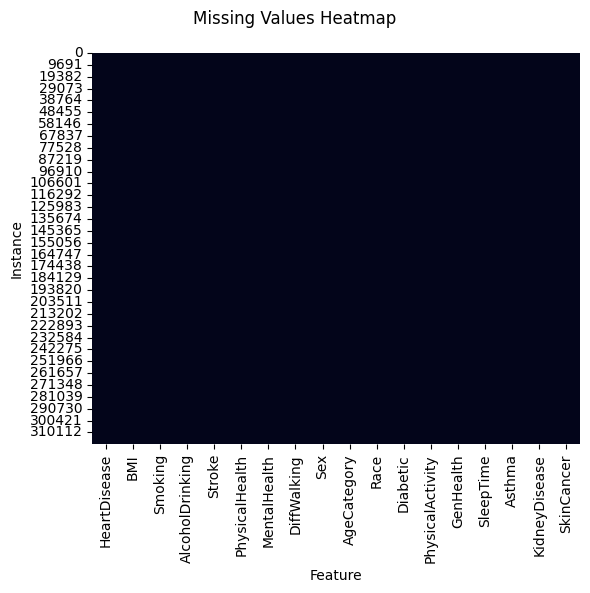

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(df1.isnull(), cbar=False)
ax.set_xlabel("Feature")
ax.set_ylabel("Instance")
plt.suptitle("Missing Values Heatmap")
plt.tight_layout()
plt.savefig("MissingValues.png", dpi = 300)
plt.show()

### Features

The information shows that the dataset contains a combination of categorical and numerical datapoints. We can now give an overview of what each variable measures:

- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
  
- BMI: Body Mass Index (BMI).
  
- Smoking: Have you smoked at least 100 cigarettes in your entire life?
  
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
  
- Stroke: Have you ever had a stroke?
  
- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
  
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
  
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
  
- Sex: Are you male or female?
  
- AgeCategory: Fourteen-level age category. (then calculated the mean)
  
- Race: Imputed race/ethnicity value.
  
- Diabetic: Have you ever had diabetes?
  
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
  
- GenHealth: Would you say that in general your health is...
  
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
  
- Asthma: Have you ever had asthma?
  
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
  
- SkinCancer: Have you ever had skin cancer?

We can explore the dataset through the lense of each datatype, we will begin with the categorical data.

# Exploratory Data Analysis

## Categorical variables

### Pie Charts

### Ratio of Heart Disease

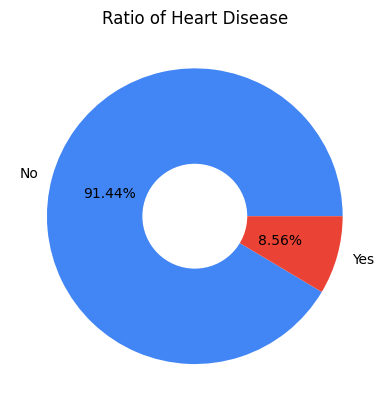

In [7]:
plt.pie(x = df1['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df1['HeartDisease'].value_counts().index, colors=["#4285f4","#ea4335"])
plt.title('Ratio of Heart Disease')
circle = plt.Circle( (0,0), 0.35, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show
plt.savefig("RatioHeartDisease.png")

### Ratio of Smokers

<function matplotlib.pyplot.show(close=None, block=None)>

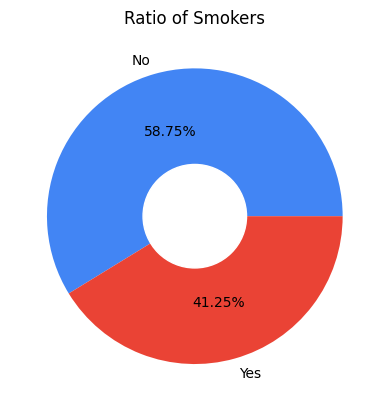

In [8]:
plt.pie(x = df1['Smoking'].value_counts() ,autopct='%1.2f%%' ,labels=df1['Smoking'].value_counts().index, colors=["#4285f4","#ea4335"])
plt.title('Ratio of Smokers')
circle = plt.Circle( (0,0), 0.35, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show

### Ratio of Kidney Disease

<function matplotlib.pyplot.show(close=None, block=None)>

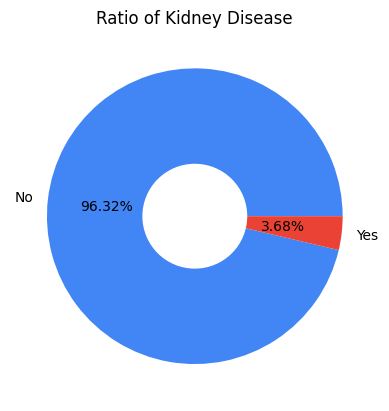

In [9]:
plt.pie(x = df1['KidneyDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df1['KidneyDisease'].value_counts().index, colors=["#4285f4","#ea4335"])
plt.title('Ratio of Kidney Disease')
circle = plt.Circle( (0,0), 0.35, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show

### Ratio of Skin Cancer

<function matplotlib.pyplot.show(close=None, block=None)>

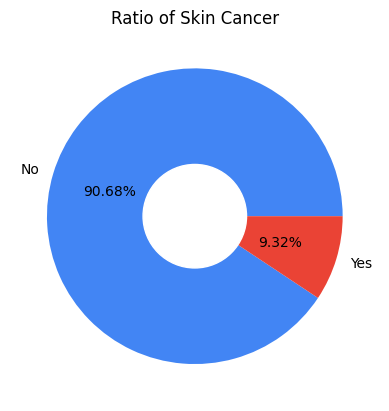

In [10]:
plt.pie(x = df1['SkinCancer'].value_counts() ,autopct='%1.2f%%' ,labels=df1['SkinCancer'].value_counts().index, colors=["#4285f4","#ea4335"])
plt.title('Ratio of Skin Cancer')
circle = plt.Circle( (0,0), 0.35, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show

## Disributions

### Distribution of Cases with Yes/No Heeart Disease According to Sex

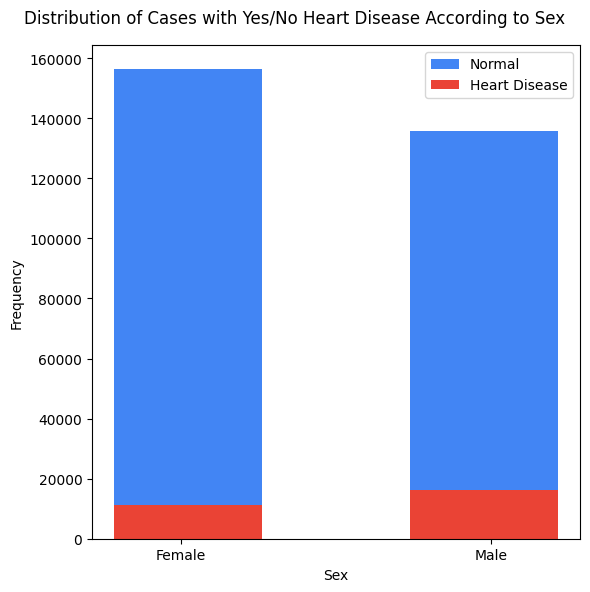

In [11]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(df1[df1["HeartDisease"]=="No"]["Sex"], bins=3, alpha=1, color="#4285f4", label="Normal")
ax.hist(df1[df1["HeartDisease"]=="Yes"]["Sex"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")
ax.set_xticks([0.15,0.85],['Female', 'Male'])
fig.suptitle("Distribution of Cases with Yes/No Heart Disease According to Sex")
fig.tight_layout()
ax.legend()
plt.savefig("SexHeartDisease.png")

- More Males have heart disease
- More Females do not have heart disease

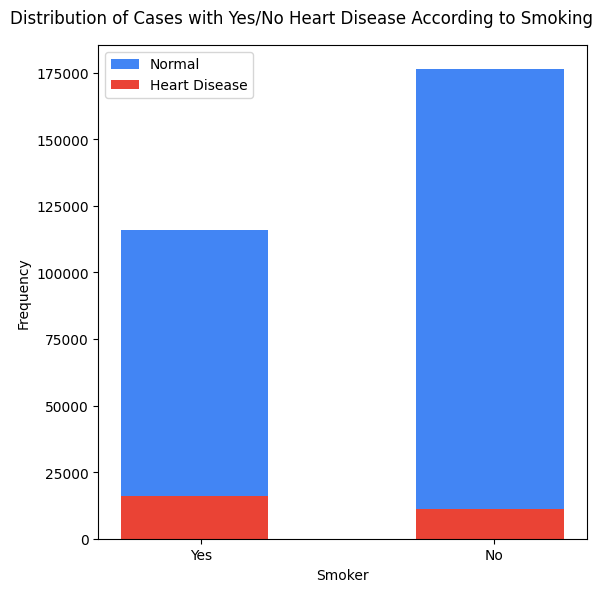

In [12]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(df1[df1["HeartDisease"]=="No"]["Smoking"], bins=3, alpha=1, color="#4285f4", label="Normal", align = 'left')
ax.hist(df1[df1["HeartDisease"]=="Yes"]["Smoking"], bins=3, alpha=1, color="#ea4335", label="Heart Disease", align ='left')

ax.set_xlabel("Smoker")
ax.set_ylabel("Frequency")
ax.set_xticks([0.015,0.675],['Yes', 'No'])

fig.suptitle("Distribution of Cases with Yes/No Heart Disease According to Smoking")
fig.tight_layout()
ax.legend()
plt.savefig("SmokingHeartDisease.png")

- More smokers have heart disease
- More smokers do not have heart disease

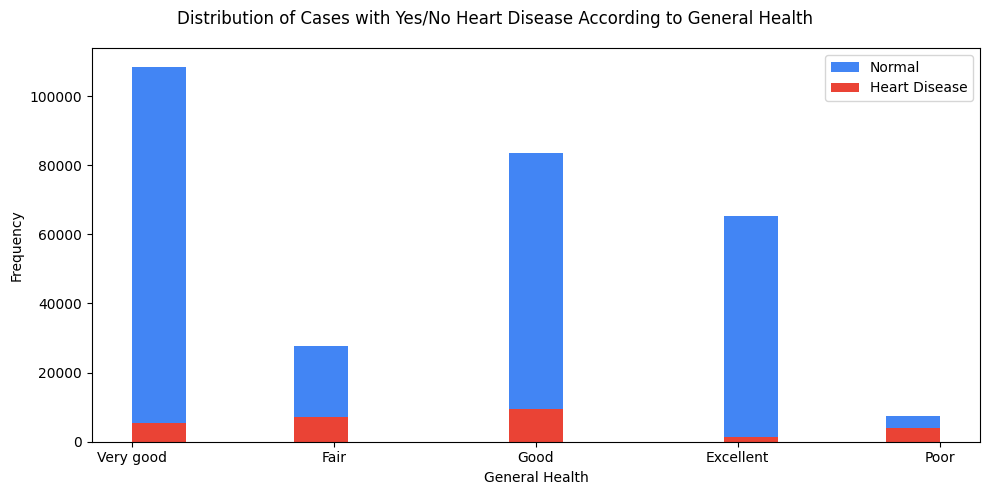

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(df1[df1["HeartDisease"]=="No"]["GenHealth"], bins=15, alpha=1, color="#4285f4", label="Normal")
ax.hist(df1[df1["HeartDisease"]=="Yes"]["GenHealth"], bins=15, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("General Health")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Heart Disease According to General Health")
fig.tight_layout()
ax.legend()
plt.savefig("GenHealth.png")

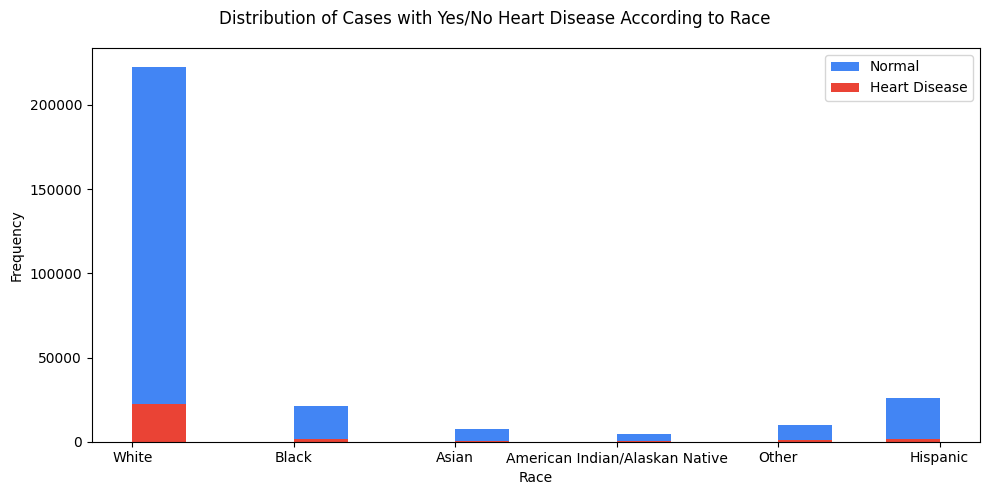

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(df1[df1["HeartDisease"]=="No"]["Race"], bins=15, alpha=1, color="#4285f4", label="Normal")
ax.hist(df1[df1["HeartDisease"]=="Yes"]["Race"], bins=15, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Heart Disease According to Race")
fig.tight_layout()
ax.legend()
plt.savefig("RaceHeartdisease.png")

### Numerical Variables

In [15]:
numerical_features = []
for column, i in zip(df1.columns, df1.dtypes):
    if i != object:
        numerical_features.append(column)


In [16]:
print(numerical_features)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


### Distributions

Distributions are plotted in a panel to allow quick comparison for the viewer

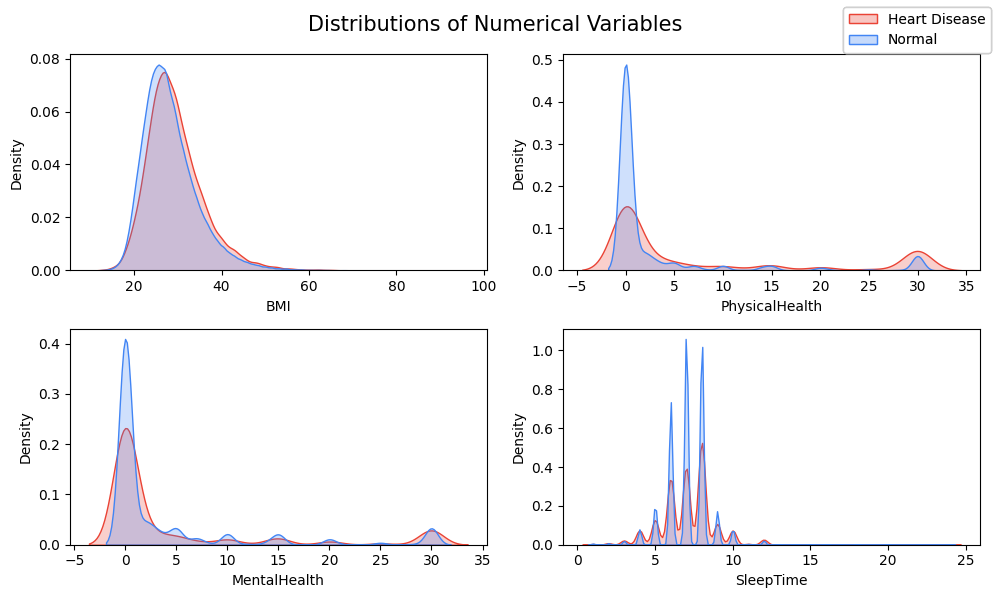

In [17]:
position_axes = [(0,0), (0,1), (1,0), (1,1)]
fig, axes = plt.subplots(2,2, figsize=(10,6))
for position, feature in zip(position_axes, numerical_features):
    sns.kdeplot(df1[df1['HeartDisease']=='Yes'][feature],shade=True,color='#ea4335',ax= axes[position], label = "Heart Disease")
    sns.kdeplot(df1[df1['HeartDisease']=='No'][feature],shade=True,color='#4285f4',ax= axes[position], label = "Normal")
    fig.legend(labels = ["Heart Disease", "Normal"], loc="upper right")
    fig.suptitle("Distributions of Numerical Variables", fontsize=15)
    fig.tight_layout()
    plt.savefig("Distributions.png")
    


## Boxplots


In [18]:
def draw_box_plot(x_axis_feature):
    position_axes = [(0,0), (0,1), (1,0), (1,1)]
    fig, axes = plt.subplots(2,2, figsize=(10,6))
    for position, feature in zip(position_axes, numerical_features):
        sns.boxplot(ax= axes[position],data=df1, x=x_axis_feature, y=feature, palette=["#4285f4","#ea4335"])
        
    fig.suptitle("Numerical Features in Relation to" +" "+ x_axis_feature, fontsize=15)
    fig.tight_layout()
    plt.savefig(x_axis_feature+".png")
    plt.show()
    

### Heart Disease Boxplot

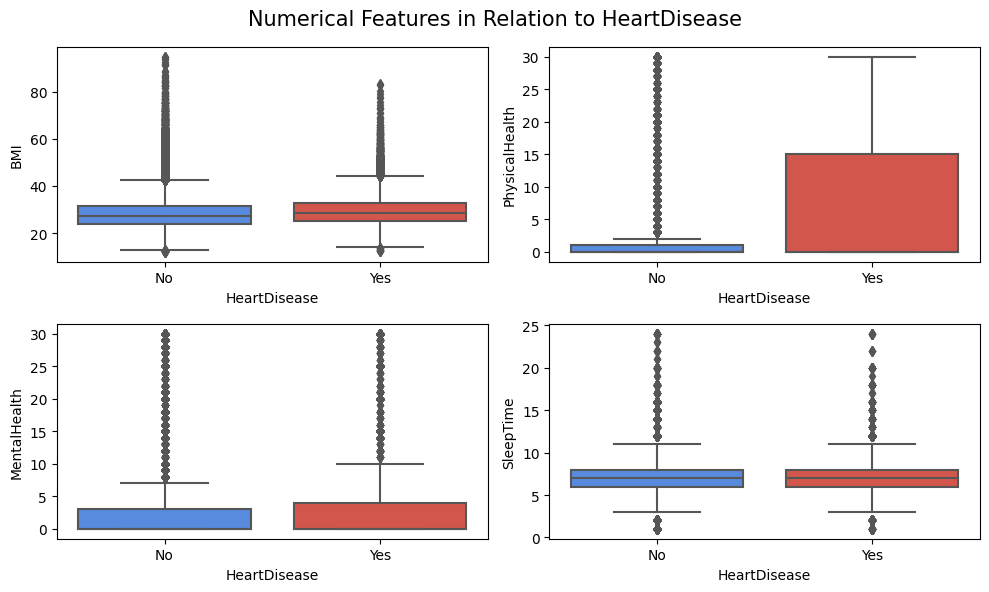

In [19]:
draw_box_plot("HeartDisease")

### Smoking Boxplot

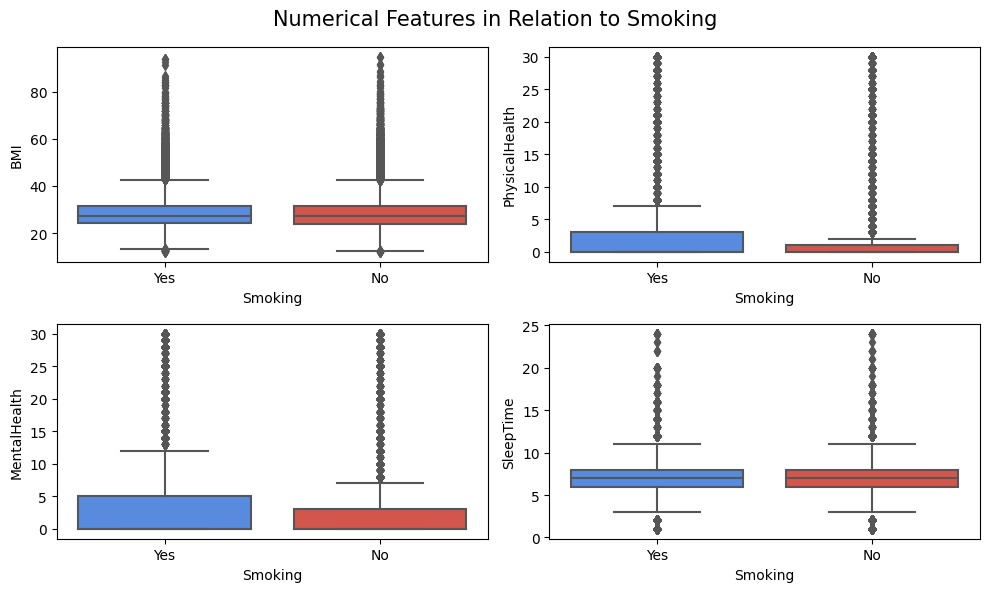

In [20]:
draw_box_plot("Smoking")

### Sex boxplot

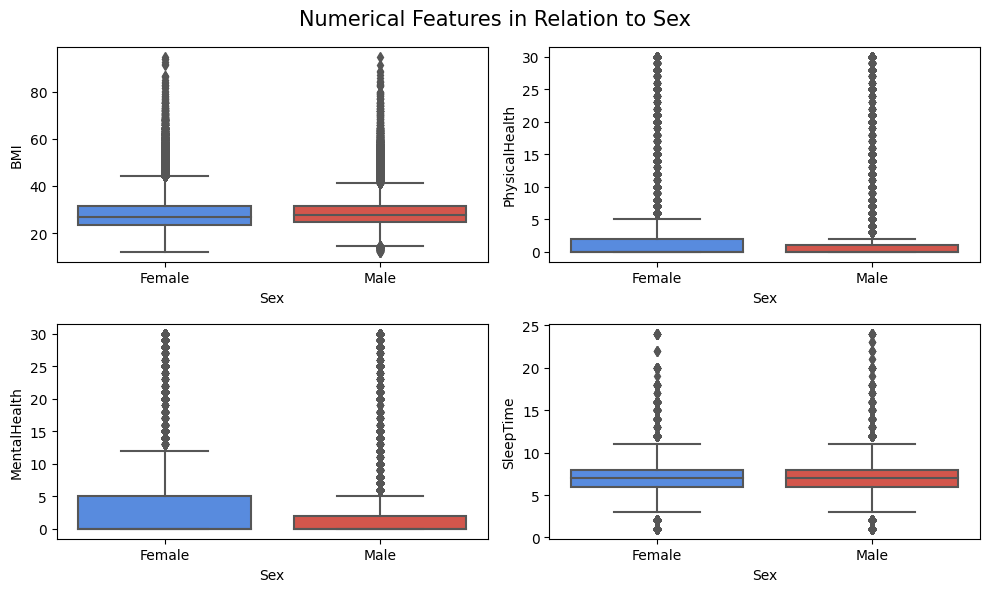

In [21]:
draw_box_plot("Sex")

## Data Transformation

We have analysed the categorical and numerical features seperately. Now we can look at them together by transforming the categorical features with the LabelEncoder() function from Scikit-Learn.

In [22]:
le = LabelEncoder()
le.fit(df1['HeartDisease'])
df1['HeartDisease']=le.transform(df1['HeartDisease'])

le.fit(df1['Smoking'])
df1['Smoking']=le.transform(df1['Smoking'])

le.fit(df1['AlcoholDrinking'])
df1['AlcoholDrinking']=le.transform(df1['AlcoholDrinking'])

le.fit(df1['Stroke'])
df1['Stroke']=le.transform(df1['Stroke'])

le.fit(df1['DiffWalking'])
df1['DiffWalking']=le.transform(df1['DiffWalking'])

le.fit(df1['Sex'])
df1['Sex']=le.transform(df1['Sex'])

le.fit(df1['AgeCategory'])
df1['AgeCategory']=le.transform(df1['AgeCategory'])

le.fit(df1['Race'])
df1['Race']=le.transform(df1['Race'])

le.fit(df1['Diabetic'])
df1['Diabetic']=le.transform(df1['Diabetic'])


le.fit(df1['PhysicalActivity'])
df1['PhysicalActivity']=le.transform(df1['PhysicalActivity'])

le.fit(df1['GenHealth'])
df1['GenHealth']=le.transform(df1['GenHealth'])

le.fit(df1['Asthma'])
df1['Asthma']=le.transform(df1['Asthma'])

le.fit(df1['KidneyDisease'])
df1['KidneyDisease']=le.transform(df1['KidneyDisease'])

le.fit(df1['SkinCancer'])
df1['SkinCancer']=le.transform(df1['SkinCancer'])

### Pearson Correlation

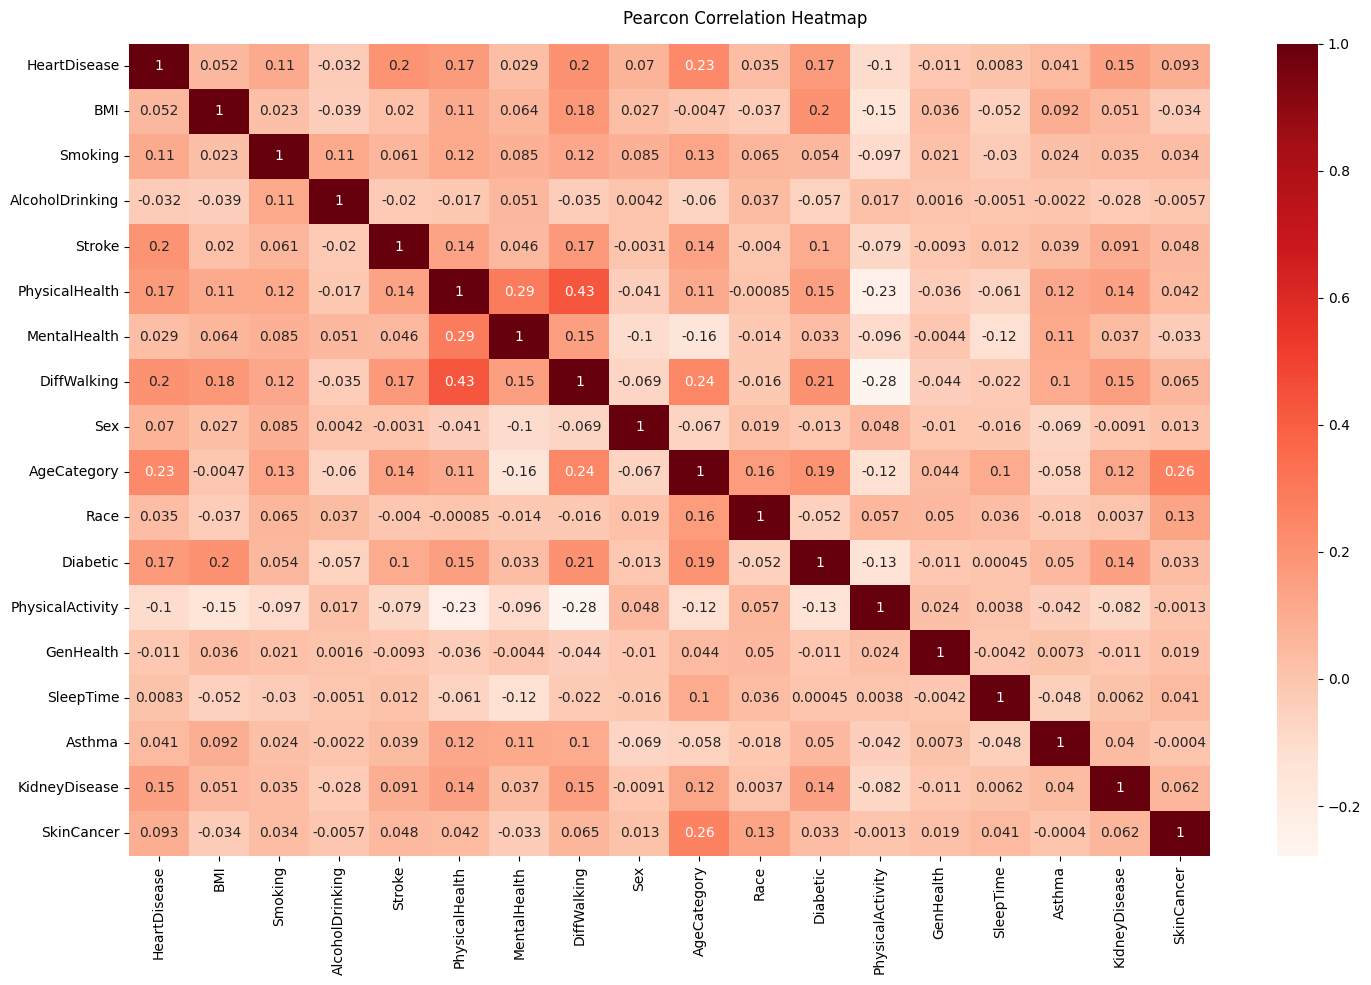

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

ax =sns.heatmap(df1.corr(), annot=True, cmap="Reds")
fig.suptitle("Pearcon Correlation Heatmap")
fig.tight_layout()
plt.savefig("PearsonCorrelationMatrix.png", bbox_inches="tight")
plt.show()

# K-Means Clustering

In [24]:
cols = df1.columns

- Importing scaling function to prevevent columns with larger values dominating
- Storing the scaled data in a new dataframe

In [25]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler(feature_range= (1,10))

df2 = ms.fit_transform(df1)

- Importing Scikit-Learn k-means algorithm

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42) 

kmeans.fit(df2)
kmeans.predict(df2)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


Dataframe to show the coordinates of each centroid

In [27]:
pd.DataFrame(centroids, columns = cols).T

,0,1
HeartDisease,1.602521,1.955662
BMI,2.753977,2.791233
Smoking,4.353660,5.108237
AlcoholDrinking,1.603808,1.622877
Stroke,1.344704,1.334088
PhysicalHealth,2.104368,1.908997
MentalHealth,2.396775,1.918597
DiffWalking,2.453795,2.024646
Sex,1.000000,10.000000
AgeCategory,6.057598,5.696340


Calculating the inertia of the algorithm

In [28]:
kmeans.inertia_

37479636.70172764

In [29]:
kmeans.score(df2)

-37479636.70172764

Importing silhouette score function to evaluate performance

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
import time
start = time.time()

print(silhouette_score(df2, kmeans.labels_))

end = time.time()
print(end - start)

0.16399225144339333
685.5222041606903


# Decision Tree Classifier 

Importing the Decision Tree Classifier and different functions that evaluate the performance of the tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import graphviz

### Split Data
Seperating the data into an 80/20 split

In [33]:
Y = df1["HeartDisease"]
X = df1.drop("HeartDisease", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#### Training Data Description

In [34]:
X_train.shape
print(X_train)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
95877   23.33        1                0       0             0.0           0.0   
228939  27.46        1                0       1            30.0           0.0   
260256  32.69        0                0       0             2.0           2.0   
84785   31.32        0                0       0             0.0           0.0   
83845   24.63        1                0       0             2.0          10.0   
...       ...      ...              ...     ...             ...           ...   
119879  29.65        0                0       0             0.0           0.0   
259178  42.60        1                0       0             0.0           5.0   
131932  31.19        1                0       0            12.0           6.0   
146867  22.24        0                0       0             7.0           5.0   
121958  36.39        1                0       0             0.0           0.0   

        DiffWalking  Sex  A

In [35]:
Y_train.shape
print(Y_train)

95877     0
228939    1
260256    0
84785     0
83845     1
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: HeartDisease, Length: 255836, dtype: int64


## Model

In [36]:
model = DecisionTreeClassifier(max_depth=5, max_features =17)
model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, max_features=17)

### Scores

In [37]:
model.score(X_train, Y_train)

0.9158406166450382

In [38]:
model.score(X_test, Y_test)

0.912756609703091

In [39]:
Y_pred = model.predict(X_test)

In [40]:
target_names = ["No", "Yes"]

Evaluating the performance of the model

In [41]:
print(classification_report(Y_test, Y_pred,  target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     58367
         Yes       0.51      0.06      0.10      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.53      0.53     63959
weighted avg       0.88      0.91      0.88     63959



### Confusion Matrix

In [42]:
con = confusion_matrix(Y_test, Y_pred)
print(con)

[[58054   313]
 [ 5267   325]]


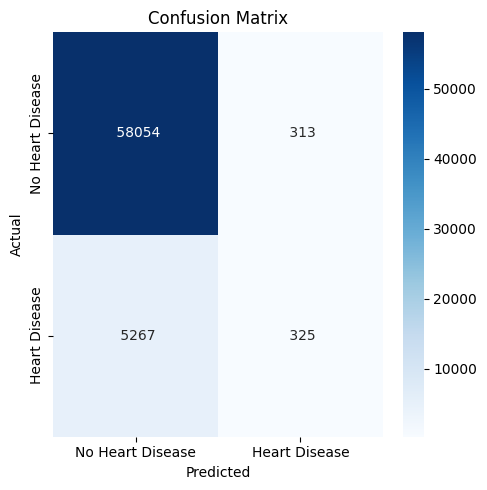

In [43]:
fig = plt.figure(figsize= (5,5))
ax = sns.heatmap(con, annot=True, cmap='Blues', fmt=" ")
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.xaxis.set_ticklabels(["No Heart Disease", "Heart Disease"])
ax.yaxis.set_ticklabels(["No Heart Disease", "Heart Disease"])
plt.title( 'Confusion Matrix')
plt.tight_layout()
plt.savefig("ConfusionMatrix.png")
plt.show()

### Decision Tree Classifier Diagram

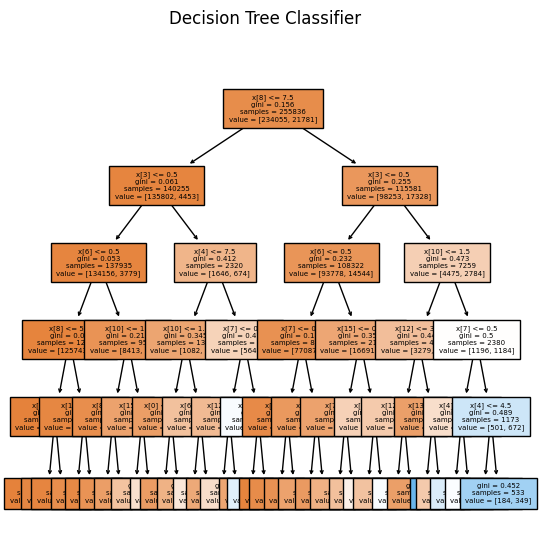

In [44]:
fig = plt.figure(figsize= (6,6))
tree.plot_tree(model , filled=True, fontsize=5)
fig.suptitle("Decision Tree Classifier")
plt.savefig("DecisionTree.png")

### Feature Importance diagram

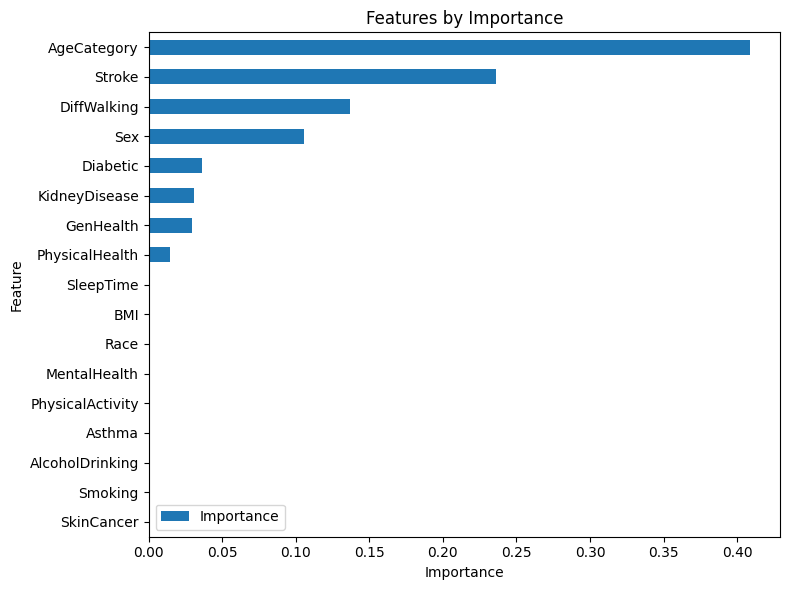

In [45]:
feat_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
ax = feat_importances.plot(kind='barh', title="Features by Importance",figsize=(8,6), legend=True, )
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.savefig("FeatureImportance.png")